<a href="https://colab.research.google.com/github/pedronic/Fund_Aprend_Maq/blob/master/16_95021_6_PedroNicolauArcuri_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [9]:
filename = 'csv_6.csv'

# Lê o arquivo csv
pdf = pd.read_csv(filename)
print ("Formato do conjunto de dados: ", pdf.shape)

pdf.head(5)

Formato do conjunto de dados:  (1999, 2)


,-6.053299202522989,2.040834891111491
0,5.557965,-5.632321
1,-3.113095,0.796495
2,3.353478,-5.547138
3,-4.100594,1.236692
4,5.392955,-4.918162


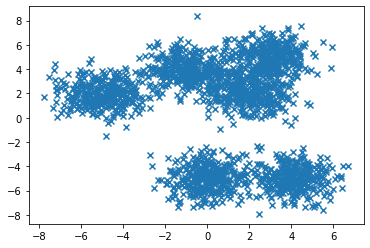

In [32]:
kX = pdf.keys()[0]
kY = pdf.keys()[1]
plt.scatter(pdf[kX][:],pdf[kY][:],marker="x")

In [0]:
agglom = AgglomerativeClustering(n_clusters = 7, linkage = 'average')

In [90]:
agglom.fit(pdf)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7,
                        pooling_func='deprecated')

In [91]:
agglom.labels_

array([3, 2, 3, ..., 2, 0, 2])

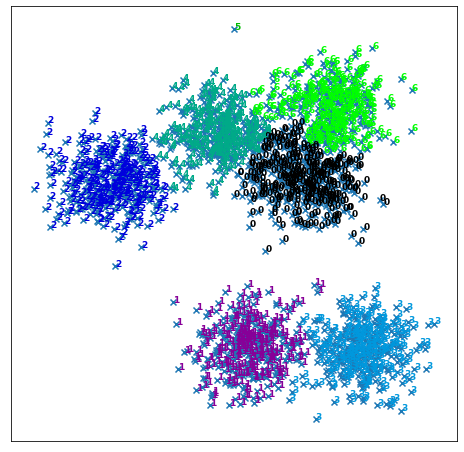

In [92]:
# Cria uma figura de tamanho 8 polegadas por 8 polegadas.
plt.figure(figsize=(8,8))


# Crie um intervalo mínimo e máximo de pdf.
x_min, x_max = np.min(pdf, axis=0), np.max(pdf, axis=0)

# Obtenha a distância média de pdf.
pdf = (pdf - x_min) / (x_max - x_min)

# Esse loop exibe todos os pontos de dados.
for i in range(len(pdf[kX])):
    # Substitua os pontos de dados pelo respectivo valor de cluster
    # (ex. 0) e é codificado por cores com um mapa de cores (plt.cm.spectral)
    plt.text(pdf[kX][i], pdf[kY][i], agglom.labels_[i],
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove as marcações nos eixos x e y
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Exibir o gráfico dos dados originais antes de clusterizar
plt.scatter(pdf[kX][:],pdf[kY][:], marker='x')
# Exibe o gráfico
plt.show()

In [93]:
dist_matrix = distance_matrix(pdf,pdf) 
print(dist_matrix)

[[0.         0.71826381 0.1525141  ... 0.84157802 0.66528513 0.76691208]
 [0.71826381 0.         0.59350551 ... 0.12606216 0.31958887 0.05853805]
 [0.1525141  0.59350551 0.         ... 0.71912572 0.59810291 0.64605304]
 ...
 [0.84157802 0.12606216 0.71912572 ... 0.         0.36234908 0.07511425]
 [0.66528513 0.31958887 0.59810291 ... 0.36234908 0.         0.31208776]
 [0.76691208 0.05853805 0.64605304 ... 0.07511425 0.31208776 0.        ]]


In [94]:
Z = hierarchy.linkage(dist_matrix, 'average')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


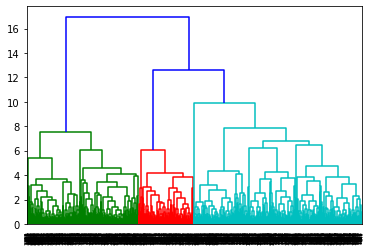

In [96]:
dendro = hierarchy.dendrogram(Z)